In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/Breast Ultrasound/Datasets/Malignant ROI.zip" -d "/content"

print('\n\ndone!')

Archive:  /content/drive/MyDrive/Breast Ultrasound/Datasets/Malignant ROI.zip
  inflating: /content/Malignant ROI/M_ROI 1.png  
  inflating: /content/Malignant ROI/M_ROI 10.png  
  inflating: /content/Malignant ROI/M_ROI 100.png  
  inflating: /content/Malignant ROI/M_ROI 101.png  
  inflating: /content/Malignant ROI/M_ROI 102.png  
  inflating: /content/Malignant ROI/M_ROI 103.png  
  inflating: /content/Malignant ROI/M_ROI 104.png  
  inflating: /content/Malignant ROI/M_ROI 105.png  
  inflating: /content/Malignant ROI/M_ROI 106.png  
  inflating: /content/Malignant ROI/M_ROI 107.png  
  inflating: /content/Malignant ROI/M_ROI 108.png  
  inflating: /content/Malignant ROI/M_ROI 109.png  
  inflating: /content/Malignant ROI/M_ROI 11.png  
  inflating: /content/Malignant ROI/M_ROI 110.png  
  inflating: /content/Malignant ROI/M_ROI 111.png  
  inflating: /content/Malignant ROI/M_ROI 112.png  
  inflating: /content/Malignant ROI/M_ROI 113.png  
  inflating: /content/Malignant ROI/M_ROI 

In [ ]:
!unzip -u "/content/drive/MyDrive/Breast Ultrasound/Datasets/Dataset_BUSI.zip" -d "/content"

print('\n\ndone!')

unzip:  cannot find or open /content/drive/MyDrive/Breast Ultrasound/Datasets/Dataset_BUSI.zip, /content/drive/MyDrive/Breast Ultrasound/Datasets/Dataset_BUSI.zip.zip or /content/drive/MyDrive/Breast Ultrasound/Datasets/Dataset_BUSI.zip.ZIP.


done!


In [ ]:
from PIL import Image

# Load the input image
img = Image.open('/content/Malignant ROI/M_ROI 189.png')

# Convert the image to grayscale
gray_img = img.convert('L')

# Get the size of the image
width, height = gray_img.size

# Define the size of the border
border_size = 10

# Find black and white pixels inside the border
black_pixels = 0
white_pixels = 0
for x in range(border_size, width - border_size):
    for y in range(border_size, height - border_size):
        pixel = gray_img.getpixel((x, y))
        if pixel == 0:
            black_pixels += 1
        elif pixel == 255:
            white_pixels += 1

# Print the results
print(f"Number of black pixels inside the border: {black_pixels}")
print(f"Number of white pixels inside the border: {white_pixels}")

Number of black pixels inside the border: 172827
Number of white pixels inside the border: 0


In [ ]:
from PIL import Image

# Load the input image
img = Image.open('/content/Dataset_BUSI_with_GT/malignant/malignant (107)_mask.png')

# Convert the image to grayscale
gray_img = img.convert('L')

# Find black and white pixels
black_pixels = 0
white_pixels = 0
for pixel in gray_img.getdata():
    if pixel == 0:
        black_pixels += 1
    elif pixel == 255:
        white_pixels += 1

# Print the results
print(f"Number of black pixels: {black_pixels}")
print(f"Number of white pixels: {white_pixels}")

Number of black pixels: 209173
Number of white pixels: 3225


In [ ]:
import cv2

# Load the input image
img = cv2.imread('/content/Dataset_BUSI_with_GT/malignant/malignant (107)_mask.png')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find the contour of the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the input image to draw the contour
img_contour = img.copy()

# Loop through each contour and draw it on the copy of the input image
for contour in contours:
    cv2.drawContours(img_contour, [contour], 0, (0, 255, 0), 2)

# Create a binary mask of the contour
contour_mask = cv2.drawContours(np.zeros_like(gray_img), contours, -1, 255, cv2.FILLED)

# Find black and white pixels inside the contour
black_pixels = 0
white_pixels = 0
for x in range(mask.shape[1]):
    for y in range(mask.shape[0]):
        if contour_mask[y, x] == 255:
            pixel = gray_img[y, x]
            if pixel == 0:
                black_pixels += 1
            elif pixel == 255:
                white_pixels += 1

# Print the results
print(f"Number of black pixels inside the contour: {black_pixels}")
print(f"Number of white pixels inside the contour: {white_pixels}")

Number of black pixels inside the contour: 0
Number of white pixels inside the contour: 31747


Peak Point

In [ ]:
# Importing Required Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

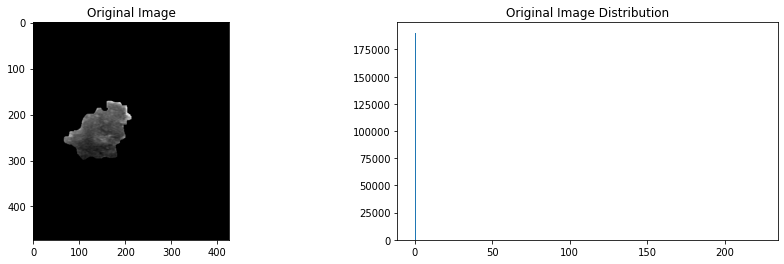

In [ ]:
image = cv2.imread('/content/Malignant ROI/M_ROI 189.png', cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.hist(image.ravel(), bins=256)
ax2.title.set_text('Original Image Distribution')

In [ ]:
# Computing T Values until difference in T is smaller than T0
T = (np.max(image) + np.min(image)) // 2 # Initial Estimate of T
T0 = 0

while(True):
    print(f'Thresholding Value: {T}')
    u1 = [x for x in image.ravel() if x > T ]
    u2 = [x for x in image.ravel() if x <= T ]
    T_new = ((sum(u1)/len(u1)) + (sum(u2)/len(u2))) // 2
    if abs(T_new - T) <=  T0:
        break
    else:
        T = T_new

global_thres = image > T

Thresholding Value: 111
Thresholding Value: 72.0
Thresholding Value: 48.0
Thresholding Value: 40.0
Thresholding Value: 38.0


True

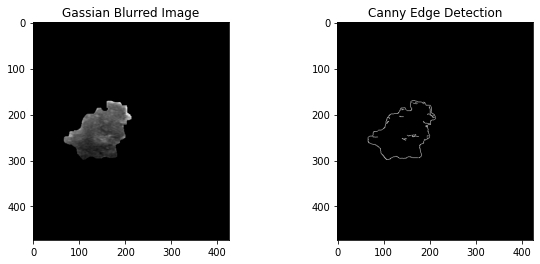

In [ ]:
THRESHOLD1 = 100
THRESHOLD2 = 200

canny = cv2.Canny(image, THRESHOLD1, THRESHOLD2)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Gassian Blurred Image')
ax2.imshow(canny, cmap='gray')
ax2.title.set_text('Canny Edge Detection')

# Save the output image
cv2.imwrite('/content/canny_edge.png',canny)


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, feature, morphology

# Load the tumor image
image = io.imread('/content/Malignant ROI/M_ROI 189.png', as_gray=True)

# Detect the edges of the tumor using the Canny edge detector
edges = feature.canny(image, sigma=3)

# Dilate the edges to enhance the spicules
dilated = morphology.binary_dilation(edges, selem=morphology.disk(3))

# Save the output image
cv2.imwrite('/content/spiculation.png',dilated)

# Plot the original image and the enhanced spiculation
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(dilated, cmap='gray')
ax[1].set_title('Spiculation')
plt.show()

error: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

# Load the tumor image
image = np.load('/content/Malignant ROI/M_ROI 189.png')

# Compute the gradient of the image along each axis
dx = ndimage.sobel(image, axis=0)
dy = ndimage.sobel(image, axis=1)
dz = ndimage.sobel(image, axis=2)

# Compute the magnitude of the gradient vector at each point
magnitude = np.sqrt(dx**2 + dy**2 + dz**2)

# Plot the original image and the Acutance 3D
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image[20, :, :], cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(magnitude[20, :, :], cmap='gray')
ax[1].set_title('Acutance 3D')
plt.show()





ValueError: ignored

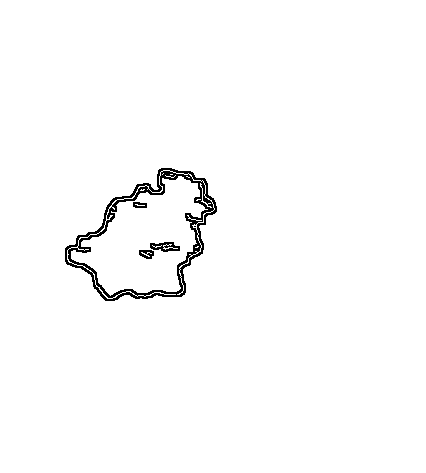

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread('/content/canny_edge.png')


# Define the size of the local neighborhood
neighborhood_size = 5

# Find the local maxima in the edge image
local_max = (cv2.dilate(img, np.ones((neighborhood_size, neighborhood_size))) == img).astype(np.uint8) * 255

# Save the output image
cv2.imwrite('/content/local_maxima.png',local_max)

# Show the image
cv2_imshow(local_max)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the shape image
image = io.imread("/content/local_maxima.png")

# Convert the image to a DEM
dem = np.max(image) - image

# Set the threshold elevation value
threshold = 0.4 * np.max(dem)

# Find all the high points in the DEM
high_points = np.where(dem > threshold)

# Visualize the DEM and the high points
fig, ax = plt.subplots()
ax.imshow(dem, cmap='gray')
ax.plot(high_points[1], high_points[0], 'ro')
plt.show()

# Save the output image
cv2.imwrite('/content/high_point.png',dem)

NameError: ignored

Shape scatter pattern

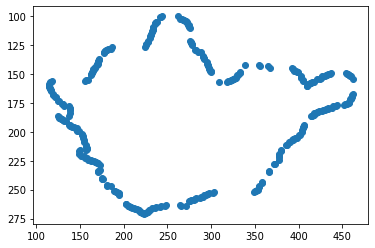

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread('/content/Dataset_BUSI_with_GT/malignant/malignant (107)_mask.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to get a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the x and y coordinates of all the contour points
x_coords = []
y_coords = []
for contour in contours:
    for point in contour:
        x = point[0][0]
        y = point[0][1]
        x_coords.append(x)
        y_coords.append(y)

# Plot the scatter pattern of the contour points
plt.scatter(x_coords, y_coords)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import cv2
import numpy as np

# Load the input image and convert it to grayscale
img = Image.open('/content/Dataset_BUSI_with_GT/malignant/malignant (107)_mask.png').convert('L')

# Apply Sobel edge detection to highlight the edges
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
img_edges = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# Apply Harris corner detection to find the peak and bottom points

corners = cv2.dilate(corners, None)
threshold = 0.1 * corners.max()
peaks = np.argwhere(corners > threshold)
bottoms = np.argwhere(corners < threshold)

# Count the number of detected peak and bottom points
num_peaks = len(peaks)
num_bottoms = len(bottoms)

print(f"Number of peak points: {num_peaks}")
print(f"Number of bottom points: {num_bottoms}")


error: ignored

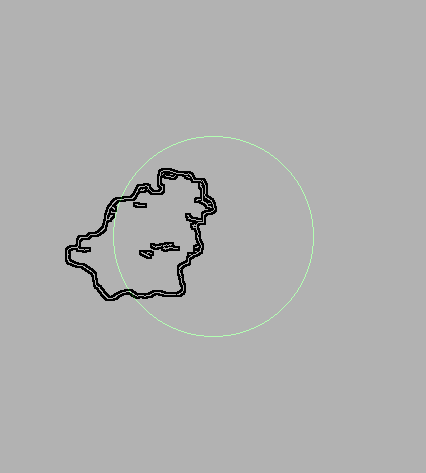

In [ ]:
import cv2
import numpy as np

# Load input image and get its dimensions
img = cv2.imread('/content/local_maxima.png')
height, width = img.shape[:2]

# Define center and radius of circle
center = (width // 2, height // 2)  # Use the center of the image
radius = 100  # Adjust this as desired

# Create a blank canvas with the same dimensions as input image
canvas = np.zeros_like(img)

# Define the initial values of x and y for the midpoint algorithm
x = 0
y = radius
p = 5/4 - radius

# Implement the midpoint algorithm to draw the circle
while x <= y:
    # Draw points in all eight octants
    canvas[center[1]+y, center[0]+x] = [0, 255, 0]  # Green
    canvas[center[1]+x, center[0]+y] = [0, 255, 0]  # Green
    canvas[center[1]-y, center[0]+x] = [0, 255, 0]  # Green
    canvas[center[1]-x, center[0]+y] = [0, 255, 0]  # Green
    canvas[center[1]+y, center[0]-x] = [0, 255, 0]  # Green
    canvas[center[1]+x, center[0]-y] = [0, 255, 0]  # Green
    canvas[center[1]-y, center[0]-x] = [0, 255, 0]  # Green
    canvas[center[1]-x, center[0]-y] = [0, 255, 0]  # Green

    # Update x, y, and p
    x += 1
    if p < 0:
        p += 2*x + 1
    else:
        y -= 1
        p += 2*(x - y) + 1

# Overlay the canvas on the input image with an alpha value of 0.3
output = cv2.addWeighted(img, 0.7, canvas, 0.3, 0)

# Display the output image with the circle overlaid
cv2_imshow(output)


In [ ]:
!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 10.9 MB/s eta 0:00:00


In [ ]:
! pip install plotly -q

In [ ]:
!git clone https://github.com/openai/point-e

Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Total 57 (delta 0), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (57/57), 1.56 MiB | 3.45 MiB/s, done.


In [ ]:
%cd point-e

/content/point-e


In [ ]:
! pip install -e . -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.9 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import torch
from tqdm.auto import tqdm

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

In [ ]:
!pip install pclpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pclpy (from versions: none)
ERROR: No matching distribution found for pclpy


In [ ]:
import pcl
import numpy as np
from PIL import Image

# Load the input PNG image and convert it to grayscale
img = Image.open('/content/local_maxima.png').convert('L')

# Convert the image data to a numpy array
img_array = np.array(img)

# Create a list of x, y, z coordinates for each point in the image
points = []
for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        # Normalize the pixel intensity to a value between 0 and 1
        intensity = img_array[i,j] / 255.0

        # Convert the pixel coordinates to 3D coordinates
        x = i / img_array.shape[0]
        y = j / img_array.shape[1]
        z = intensity

        # Add the point to the list of points
        points.append([x, y, z])

# Convert the list of points to a numpy array
points_array = np.array(points)

# Create a PCL PointCloud object from the numpy array
cloud = pcl.PointCloud()
cloud.from_array(points_array)

# Save the point cloud to a PCD file
pcl.save(cloud, 'output_cloud.pcd')

ModuleNotFoundError: ignored

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [ ]:
!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 8.7 MB/s eta 0:00:00


In [ ]:
import pyvista as pv
import numpy as np

# Load the PNG image
image = pv.read("/content/local_maxima.png")

# Convert the image to a grayscale heightmap
heightmap = np.mean(image.point_arrays['image'], axis=1).reshape(image.dimensions)

# Create a mesh from the heightmap
mesh = pv.PolyData()
mesh.height_map(heightmap, scale_x=image.spacing[0], scale_y=image.spacing[1], z_scale=image.spacing[2])

# Convert the mesh to a point cloud
point_cloud = mesh.sample(points_per_cell=1000)

# Visualize the point cloud
point_cloud.plot()

AttributeError: ignored

In [ ]:
import pyntcloud
import numpy as np
import matplotlib.pyplot as plt

# Load the point cloud
cloud = pyntcloud.PyntCloud.from_file("shape_point_cloud.ply")

# Set the threshold elevation value
threshold = 0.8 * np.max(cloud.points['z'])

# Find all the high points in the point cloud
high_points = cloud.points.loc[cloud.points['z'] > threshold]

# Visualize the point cloud and the high points
fig, ax = plt.subplots()
ax.scatter(cloud.points['x'], cloud.points['y'], s=0.1)
ax.scatter(high_points['x'], high_points['y'], s=10, c='r')
plt.show()

Low point